<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# Assignment 4

Welcome to Assignment 4. This will be the most fun. Now we will prepare data for plotting.

Just make sure you hit the play button on each cell from top to down. There are three functions you have to implement. Please also make sure than on each change on a function you hit the play button again on the corresponding cell to make it available to the rest of this notebook.

> Note: Replace **##** placeholder with the relevent parameters


In [1]:
!pip install pyspark==3.1.2 -q
!pip install findspark -q

In [2]:
import findspark
findspark.init()

In [3]:
try:
    from pyspark import SparkContext, SparkConf
    from pyspark.sql import SparkSession
except ImportError as e:
    printmd('<<<<<!!!!! Please restart your kernel after installing Apache Spark !!!!!>>>>>')

In [4]:
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))

spark = SparkSession \
    .builder \
    .getOrCreate()

24/06/12 19:11:36 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


Sampling is one of the most important things when it comes to visualization because often the data set gets so huge that you simply

- can't copy all data to a local Spark driver (Watson Studio is using a "local" Spark driver)
- can't throw all data at the plotting library

Please implement a function which returns a 10% sample of a given data frame:


In [5]:
def getSample(df ,spark):
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html#Working-with-SQL
    #https://spark.apache.org/docs/latest/api/sql/
    result = spark.sql("select * from washing")
    return result.rdd.sample(False,0.1).collect()

Now we want to create a histogram and boxplot. Please ignore the sampling for now and return a python list containing all temperature values from the data set


In [6]:
def getListForHistogramAndBoxPlot(df, spark):
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame
    #https://spark.apache.org/docs/latest/api/sql/
    my_list = spark.sql("""
        SELECT temperature from washing where temperature is not null
    """).rdd.map(lambda row: row.temperature).collect()
    if not type(my_list)==list:
        raise Exception('return type not a list')
    return my_list

Finally we want to create a run chart. Please return two lists (encapsulated in a python tuple object) containing temperature and timestamp (ts) ordered by timestamp. Please refer to the following link to learn more about tuples in python: https://www.tutorialspoint.com/python/python_tuples.htm


In [13]:
#should return a tuple containing the two lists for timestamp and temperature
#please make sure you take only 10% of the data by sampling
#please also ensure that you sample in a way that the timestamp samples and temperature samples correspond (=> call sample on an object still containing both dimensions)
def getListsForRunChart(df, spark):
    #TODO Please enter your code here, you are not required to use the template code below
    #some reference: https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html#Working-with-SQL
    #https://spark.apache.org/docs/latest/api/sql/
    double_tuple_rdd = spark.sql("""
        select temperature, ts from washing where temperature is not null order by ts asc
    """).sample(False,0.1).rdd.map(lambda row : (row.ts,row.temperature))
    result_array_ts = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[0]).collect()
    result_array_temperature = double_tuple_rdd.map(lambda ts_temperature: ts_temperature[1]).collect()
    return (result_array_ts,result_array_temperature)

Now it is time to grab a PARQUET file and create a dataframe out of it. Using SparkSQL you can handle it like a database.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-SN0101EN-SkillsNetwork/labs/Week2_FSDS/washing.parquet
!mv washing.parquet?raw=true washing.parquet

In [8]:
df = spark.read.parquet('washing.parquet')
df.createOrReplaceTempView('washing')
df.show()

[Stage 1:>                                                          (0 + 1) / 1]

+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|                 _id|                _rev|count|flowrate|fluidlevel|frequency|hardness|speed|temperature|           ts|voltage|
+--------------------+--------------------+-----+--------+----------+---------+--------+-----+-----------+-------------+-------+
|0d86485d0f88d1f9d...|1-57940679fb8a713...|    4|      11|acceptable|     null|      77| null|        100|1547808723923|   null|
|0d86485d0f88d1f9d...|1-15ff3a0b304d789...|    2|    null|      null|     null|    null| 1046|       null|1547808729917|   null|
|0d86485d0f88d1f9d...|1-97c2742b68c7b07...|    4|    null|      null|       71|    null| null|       null|1547808731918|    236|
|0d86485d0f88d1f9d...|1-eefb903dbe45746...|   19|      11|acceptable|     null|      75| null|         86|1547808738999|   null|
|0d86485d0f88d1f9d...|1-5f68b4c72813c25...|    7|    null|      null|       75|    null| null|   

Now we gonna test the functions you've completed and visualize the data.


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

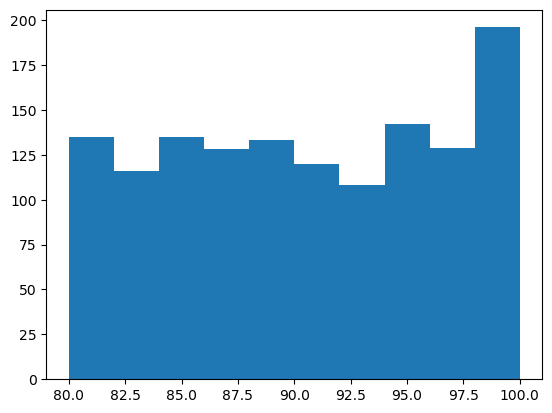

In [10]:
plt.hist(getListForHistogramAndBoxPlot(df , spark))
plt.show()

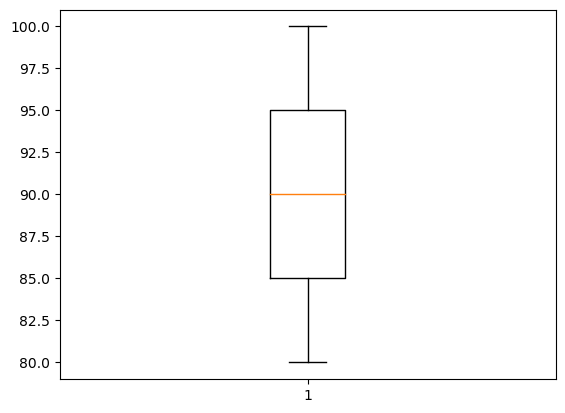

In [11]:
plt.boxplot(getListForHistogramAndBoxPlot(df , spark))
plt.show()

In [14]:
lists = getListsForRunChart(df , spark)

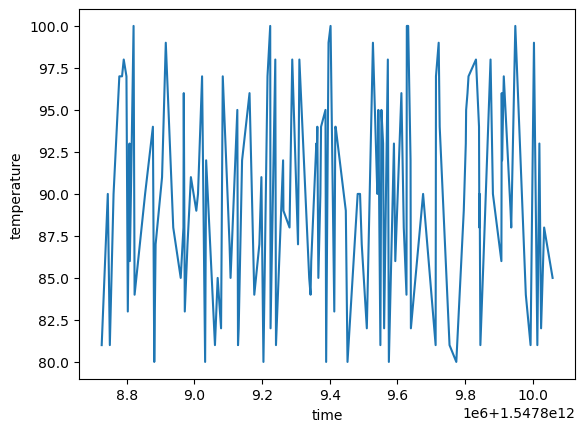

In [15]:
plt.plot(lists[0],lists[1])
plt.xlabel("time")
plt.ylabel("temperature")
plt.show()

Congratulations, you are done! The following code submits your solution to the grader. Again, please update your token from the grader's submission page on Coursera


In [16]:
!rm -f rklib.py
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-SN0101EN-SkillsNetwork/rklib.py


--2024-06-12 19:21:59--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-SN0101EN-SkillsNetwork/rklib.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2597 (2.5K) [application/x-python]
Saving to: ‘rklib.py’

rklib.py            100%[===================>]   2.54K  --.-KB/s    in 0s      

2024-06-12 19:22:00 (24.6 MB/s) - ‘rklib.py’ saved [2597/2597]



Please provide your email address and obtain a submission token on the grader’s submission page in coursera, then execute the cell

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-SN0101EN-SkillsNetwork/images/ML%20FS%20Grader%20screenshot1.png" width="500" alt="Skills Network Logo">
    </a>
</p>


In [ ]:
from rklib import submitAll
import json

key = "S5PNoSHNEeisnA6YLL5C0g"
email = "###_YOUR_CODE_GOES_HERE_###"
token = "###_YOUR_CODE_GOES_HERE_###" #you can obtain it from the grader page on Coursera (have a look here if you need more information on how to obtain the token https://youtu.be/GcDo0Rwe06U?t=276)

In [ ]:
parts_data = {}
parts_data["iLdHs"] = json.dumps(str(type(getListForHistogramAndBoxPlot(## , ##))))
parts_data["xucEM"] = json.dumps(len(getListForHistogramAndBoxPlot(## , ##)))
parts_data["IyH7U"] = json.dumps(str(type(getListsForRunChart(## , ##))))
parts_data["MsMHO"] = json.dumps(len(getListsForRunChart(## , ##)[0]))

submitAll(email, token, key, parts_data)

<h3> Congratulations! You've successfully finished this lab. <h3/>

## Author(s)

<a href="https://www.linkedin.com/in/romeo-kienzler-089b4557/" target="_blank">Romeo Kienzler
</a>

## Other Contributor(s)
- <a href="https://www.linkedin.com/in/sowmyaa-gurusamy-b4a743202/" target="_blank">Sowmyaa Gurusamy</a>

- [Malika Singla](
https://www.linkedin.com/in/malika-goyal-04798622)
- [Lakshmi Holla](https://www.linkedin.com/in/lakshmi-holla-b39062149)

## Changelog

| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2023-09-15 | 1.0 | Sowmyaa Gurusamy | Created initial version |
|

<center><h3> © IBM Corporation 2023. All rights reserved. <h3/></center>
